## Interacting with the Spotify API

Spotify can be used as a data source for various data science projects. In this exercise, we will learn how to interact with the API of this social network. Spotipy is an open source Python library that allows high-level use of the Spotify API.

### Step 1

The first step is to create an application to be able to access Spotify API services. All the information can be found [here](https://developer.spotify.com/documentation/web-api).

Once you have logged in using your Spotify account, you can create the application to access the credentials needed to consume the API. You will need to fill in the following fields:

![Spotify create app](https://github.com/4GeeksAcademy/interacting-with-the-twitter-api-project-tutorial/blob/main/assets/spotify_1.PNG?raw=true)

> NOTE: As we are not going to use this API from any other web application, leave the `Redirect URI` field as `http://localhost/`.

Once you complete the form, you will have your application created. Next, in the `settings` section you can find your `Client ID` and `Client Secret`.

### Step 2

- Install all the requirements from the `requirements.txt` file or just the required library.

In [11]:
! pip install spotipy
! pip install -r ../requirements.txt

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


### Step 3

- Create a file `.env` on the root folder of the project.
- Insert both the `client ID` and `client secret` in the file, for example:

```
CLIENT_ID="AAAAAAAAAAAABBBBBBBBBBBBCCCCCCCCCCCCC111111222222"
CLIENT_SECRET="DDDDDDDDDDDDDEEEEEEEEEEEEEEEEFFFFFFFFFFFFFF333333344444"
```

- Now we can insert this information in our Python program to start working with it

In [4]:
import os
from dotenv import load_dotenv
load_dotenv()

client_id = os.environ.get('CLIENT_ID')
client_secret = os.environ.get('CLIENT_SECRET')

### Step 4

After downloading the library and loading the environment variables, we can start working by initiating the API connection:

In [5]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

con = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id,
                                                              client_secret = client_secret))

Now we can work and interact with the API to perform the queries we want to perform.

### Step 5

In this case I have chosen Bad Bunny. First I get his ID by searching for his Spotify page (https://open.spotify.com/artist/4q3ewBCX7sLwd24euuV69X). The artist ID are the characters that follow the last forward slash, `"4q3ewBCX7sLwd24euuV69X"`. Now, I perform the search for his top 10 songs.

In [7]:
artist_id = "4q3ewBCX7sLwd24euuV69X"

# TODO: Use con.artist_top_tracks(artist_id) to get the artist's top tracks
response = 

# Empty list to store our dictionaries for each track
data = []

if response:
  # Get the `tracks` key from the response, `tracks` is a list of dictionaries where each dictionary has some data on each track
  tracks = response["tracks"]

  # TODO: Iterate over each track and create a smaller dictionary to store the information we want
  for track in tracks:
    # TODO: Get name, popularity, and duration_ms for the track
    name = 
    popularity = 
    duration_ms = 

    # Store this data in a smaller dictionary with the keys `name`, `popularity`, `duration_ms`
    track_dict = 

    # TODO: Add the small dictionary to `data`, we will use `data` to create our dataframe


# Let's print `data`` to verify
# `data` is a list of dictionaries where each dictionary represents a Bad Bunny song
data

[{'name': 'PERRO NEGRO', 'popularity': 94, 'duration_ms': 162767},
 {'name': 'MONACO', 'popularity': 90, 'duration_ms': 267194},
 {'name': 'un x100to', 'popularity': 85, 'duration_ms': 194563},
 {'name': 'Me Porto Bonito', 'popularity': 88, 'duration_ms': 178567},
 {'name': 'Ojitos Lindos', 'popularity': 86, 'duration_ms': 258298},
 {'name': 'WHERE SHE GOES', 'popularity': 79, 'duration_ms': 231704},
 {'name': 'LA CANCIÓN', 'popularity': 85, 'duration_ms': 242573},
 {'name': 'Tití Me Preguntó', 'popularity': 85, 'duration_ms': 243716},
 {'name': 'FINA', 'popularity': 85, 'duration_ms': 216327},
 {'name': 'Efecto', 'popularity': 85, 'duration_ms': 213061}]

### Step 6

Once we have modified the answer, we create the Pandas DataFrame from it:

In [8]:
import pandas as pd

# TODO: Create a DataFrame using pd.DataFrame and `data`
tracks_df = 

print(tracks_df.head(3))

          name  popularity  duration_ms
0  PERRO NEGRO          94       162767
1       MONACO          90       267194
2    un x100to          85       194563


### Step 7

A scatter plot is a good alternative to determine visually and graphically whether two variables may or may not be related to each other:

In [9]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


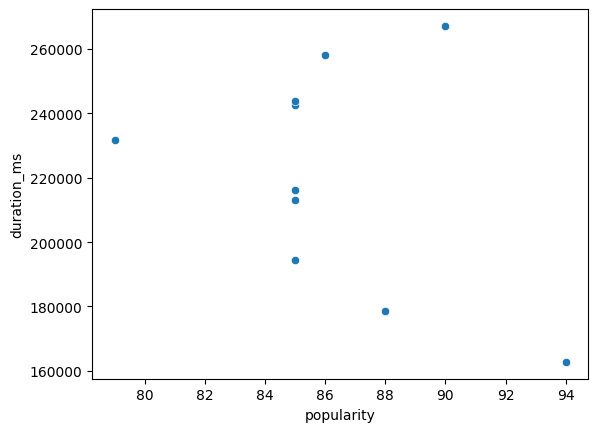

In [10]:
import seaborn as sns

# TODO: Make a scatterplot of `popularity` vs `duration_ms`
scatter_plot = 
fig = 
# fig.savefig("scatter_plot.png")

fig.show()

As can be seen, there is no direct relationship between the length of the song and its popularity.

## Further Exploration
The Spotify API enables you to grab other information like:
1. **Track Information**: Details about individual tracks, such as name, artists, album, duration, popularity, and audio features (e.g., danceability, energy, tempo).
2. **Artist Information**: Details about artists, including their name, popularity, genres, top tracks, albums, and related artists.
3. **Album Information**: Details about albums, such as name, artists, release date, total tracks, and images.
4. **User Data**: Access to a user's playlists, saved tracks, followed artists, and more (requires user authentication).
5. **Search**: Search for tracks, albums, artists, playlists, and shows based on various criteria, including keywords, genres, and popularity.
6. **Audio Analysis**: Access detailed audio analysis for tracks, including features like tempo, key, time signature, and segments.
7. **Recommendations**: Get personalized recommendations for tracks, artists, and playlists based on user preferences and listening history.

Be sure to explore the docs: https://developer.spotify.com/documentation/web-api